# Deep Neural Network for Image Classification

In this project, we show you how to build a classifier to distinquish a cat from a non-cat in a picture. We will be using Keras, a deep learning framework for Python that offers a convenient way to configure, build and train deep learning models.

Let's get started!

## 1 - Packages

Let's first import all the packages that we will need for this project. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_util import load_data

from keras import layers
from keras import models
from keras.preprocessing import image

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2


Using TensorFlow backend.


## 2 - Dataset

We will load the "Cat vs non-Cat" dataset from `data_util` library. This dataset contains

    - a training set of m_train images labelled as cat (1) or non-cat (0)
    - a test set of m_test images labelled as cat and non-cat
    - each image is of shape (64, 64, 3) where 3 is for the 3 channels (RGB).

### Let's get more familiar with the dataset. 

The following notations have been used:
- _x: image array values
- _y: image labels

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

The following code will show us an image in the dataset. We will change the index and to see other images. 

Label = 0. It's a non-cat picture.


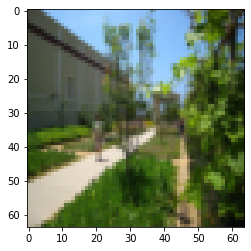

In [3]:
# Example of a picture
index = 8
plt.imshow(train_x_orig[index])
print ("Label = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

Label = 1. It's a cat picture.


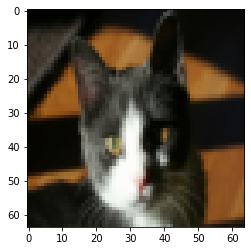

In [4]:
# Example of a picture
index = 19
plt.imshow(train_x_orig[index])
print ("Label = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [5]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples:\t " + str(m_train))
print ("Number of testing examples:\t " + str(m_test))
print ("Each image is of size:\t\t (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape:\t\t " + str(train_x_orig.shape))
print ("train_y shape:\t\t\t " + str(train_y.shape))
print ("test_x_orig shape:\t\t " + str(test_x_orig.shape))
print ("test_y shape:\t\t\t " + str(test_y.shape))

Number of training examples:	 209
Number of testing examples:	 50
Each image is of size:		 (64, 64, 3)
train_x_orig shape:		 (209, 64, 64, 3)
train_y shape:			 (1, 209)
test_x_orig shape:		 (50, 64, 64, 3)
test_y shape:			 (1, 50)


One of the goal of this project is to evaluate how well a deep learning model could extract interesting features from a small set of training data. It is true that deep learning models will normally work better with a lot of data, without the need to manually perform feature engineering. However, a well trained convolutional network can still yield very good results on small datasets.

Let's proceed to see how true!

In [6]:
# display an array of numbers representing pixel values of image with index 8 above
train_x_orig[8]

array([[[ 63,  68,  61],
        [ 64,  68,  60],
        [ 68,  71,  58],
        ...,
        [ 37,  47,  19],
        [ 50,  49,  34],
        [ 41,  39,  33]],

       [[ 65,  69,  62],
        [ 67,  71,  63],
        [ 68,  73,  64],
        ...,
        [ 45,  53,  32],
        [ 46,  41,  29],
        [ 63,  81, 101]],

       [[ 67,  70,  63],
        [ 69,  73,  65],
        [ 70,  75,  66],
        ...,
        [ 40,  45,  31],
        [ 58,  76,  91],
        [ 89, 127, 166]],

       ...,

       [[188, 180, 163],
        [191, 183, 167],
        [195, 185, 169],
        ...,
        [ 25,  33,   7],
        [ 26,  32,   8],
        [ 20,  26,   6]],

       [[184, 177, 163],
        [188, 179, 165],
        [190, 180, 165],
        ...,
        [  8,  10,   7],
        [  7,   9,   6],
        [  9,  11,   7]],

       [[181, 172, 158],
        [178, 170, 153],
        [166, 158, 137],
        ...,
        [  7,   9,   6],
        [  7,   9,   6],
        [  7,   9,   6]]

The integer numbers are pixel values of the image, ranging from 0 (black) to 255 (white). Since machine learning models tend to learn more efficiently when fed with standardized input, we will divide all the pixel values by 255, to convert them to a range of 0 to 1.

### Converting pixel integers to floats

In [7]:
train_x = train_x_orig / 255.
test_x = test_x_orig / 255.

Let's display the pixel values of image with index 8 after conversion to float values

In [8]:
# display an array of numbers representing pixel values of image with index 8 above
train_x[8]

array([[[0.24705882, 0.26666667, 0.23921569],
        [0.25098039, 0.26666667, 0.23529412],
        [0.26666667, 0.27843137, 0.22745098],
        ...,
        [0.14509804, 0.18431373, 0.0745098 ],
        [0.19607843, 0.19215686, 0.13333333],
        [0.16078431, 0.15294118, 0.12941176]],

       [[0.25490196, 0.27058824, 0.24313725],
        [0.2627451 , 0.27843137, 0.24705882],
        [0.26666667, 0.28627451, 0.25098039],
        ...,
        [0.17647059, 0.20784314, 0.1254902 ],
        [0.18039216, 0.16078431, 0.11372549],
        [0.24705882, 0.31764706, 0.39607843]],

       [[0.2627451 , 0.2745098 , 0.24705882],
        [0.27058824, 0.28627451, 0.25490196],
        [0.2745098 , 0.29411765, 0.25882353],
        ...,
        [0.15686275, 0.17647059, 0.12156863],
        [0.22745098, 0.29803922, 0.35686275],
        [0.34901961, 0.49803922, 0.65098039]],

       ...,

       [[0.7372549 , 0.70588235, 0.63921569],
        [0.74901961, 0.71764706, 0.65490196],
        [0.76470588, 0

It is always best practice to have a validation dataset, to monitor the accuracy of the model on data it has never
seen before, during training. For this reason, we will create a validation dataset by slicing 20% of the training dataset.

In [9]:
# Transpose the labels
train_y = train_y.T
test_y = test_y.T

# Final training data
train_x = train_x[40:]
train_y = train_y[40:]

# Validation data
valid_x = train_x[:40]
valid_y = train_y[:40]

# Display the shape of the datasets
print ("train_x's shape: " + str(train_x.shape))
print ("train_y's shape: " + str(train_y.shape))

print ("\nvalid_x's shape: " + str(valid_x.shape))
print ("valid_y's shape: " + str(valid_y.shape))

print ("\ntest_x's shape: " + str(test_x.shape))
print ("test_y's shape: " + str(test_y.shape))

train_x's shape: (169, 64, 64, 3)
train_y's shape: (169, 1)

valid_x's shape: (40, 64, 64, 3)
valid_y's shape: (40, 1)

test_x's shape: (50, 64, 64, 3)
test_y's shape: (50, 1)


## 3 - Architecture of the model

Now that we are familiar with the dataset, it is time to build a deep neural network to distinguish cat images from non-cat images.

### 3.1 - Convolutional Model from Scratch

Convolutional neural networks, also known as ConvNets, have been extensively used in computer vision applications and have proven to produce outstanding results in image classification. For this project, we use a 4 layer convnet to process spatial patterns in our dataset.

<u><b>Detailed Description of the model<b></u>:
- The model comprises of 2 convolutional layers, with the first layer taking in 64x64 pixel images of "cats" and "non-cat" pictures. Each image has a shape of (64,64,3), where 3 is the 3 channels - RGB
- Each convolutional layer has 8 filters, a 3x3 pixel kernel size and a `relu` activation function.
- Each convolutional layer is followed by `MaxPooling2D()`, to reduce computational complexity by downsampling the feature maps by a factor of 2.
- Next, we apply `Dropout()` to basically reduce the risk of overfitting the model to the training data.
- Finally, we apply `Flatten()` to convert the three-dimensional activation map output of the second convolutional layer to a one-dimensional array. 
- We know that the first convolutional layer learns to represent simple features in the image like straight lines and edges, and the second convolutional layer recombines these simple feaatures into more abstract representations, it means we need a way to recombine these abstract representations into particular classes of images. Therefore, we need to add a `Dense` hidden layer, with 16 neurions, that maps these spatial abstract features to a particular class of images (extracted features), before feeding these identified features to the output layer. The extracted features are received as input, rather than raw pixel values.
- The output Dense layer then receives these extracted features, and with a `sigmoid` function, it encodes the probability that the network is looking at one class or the other (for binary classification). If the probability is greater than 0.5, we classify the image as a cat, else we classify the image as a non-cat.

In [10]:
# Instantiate the model
model = models.Sequential()

# First convolutional layer, with pooling and dropout
model.add(layers.Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

# Second convolutional layer, with pooling and dropout
model.add(layers.Conv2D(8, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())

#Dense Output layer
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.2))

# output layer
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
# Summary of the Convolutional Neural Network Architecture 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 8)         584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)             

This is a relatively swallow network, with a small number of parameters to train.

To make the network ready for training, we will perform the compilation step by setting the following parameters;
- optimizer is set to `rmsprop`. This is a gradient-based optimization technique used in training neural networks, such that they update the weights of the network based on the data it sees and the loss function
- loss is set to `boinary_crossentropy`. This computes the cross-entropy loss function between true labels and predicted labels. The model uses this function to measure its performance on the training data, and subsequently how it is able to steer itself in the right direction towards global minimum
- metrics set to `accuracy`. This is used to calculate how often the predicted labels match the true labels.

In [12]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

Having preprocessed the dataset, and defined the model architecture, it is now time to fit (or train) the model. We call the `fit` method of our model and pass the training image values and labels. The model is trained for 40 epochs (40 iterations over all samples of our training data), with a batch_size of 16 and evaluated on the validation data.

Calling `model.fit()` returns a "history" object, which has a member **history**, containing data of everything that occurred during training as a dictionary. We will use this to display the training and validation losses.

In [13]:
history = model.fit(train_x, train_y,
                    epochs=40, batch_size=16,
                    validation_data=(valid_x, valid_y))

Train on 169 samples, validate on 40 samples
Epoch 1/40
169/169 [==============================] - 1s 9ms/step - loss: 0.7175 - acc: 0.5621 - val_loss: 0.6479 - val_acc: 0.7000
Epoch 2/40
169/169 [==============================] - 0s 538us/step - loss: 0.6508 - acc: 0.6331 - val_loss: 0.6382 - val_acc: 0.7000
Epoch 3/40
169/169 [==============================] - 0s 568us/step - loss: 0.6247 - acc: 0.6568 - val_loss: 0.6000 - val_acc: 0.7000
Epoch 4/40
169/169 [==============================] - 0s 568us/step - loss: 0.6006 - acc: 0.6391 - val_loss: 0.5645 - val_acc: 0.7000
Epoch 5/40
169/169 [==============================] - 0s 550us/step - loss: 0.5503 - acc: 0.6686 - val_loss: 0.6321 - val_acc: 0.6500
Epoch 6/40
169/169 [==============================] - 0s 533us/step - loss: 0.5419 - acc: 0.7101 - val_loss: 0.5278 - val_acc: 0.8250
Epoch 7/40
169/169 [==============================] - 0s 521us/step - loss: 0.5076 - acc: 0.7101 - val_loss: 0.4938 - val_acc: 0.8250
Epoch 8/40
169/169 

In [14]:
# Prediction on the testing dataset
train_loss, train_acc = model.evaluate(train_x, train_y, verbose=0)
print("Model accuracy on train data is {}%".format(round(train_acc*100),0))
print("\nModel loss on train data is {}%".format(round(train_loss*100),0))

Model accuracy on train data is 94%

Model loss on train data is 22%


In [15]:
# Prediction on the validation dataset
valid_loss, valid_acc = model.evaluate(valid_x, valid_y, verbose=0)
print("Model accuracy on valid data is {}%".format(round(valid_acc*100),0))
print("\nModel loss on valid data is {}%".format(round(valid_loss*100),0))

Model accuracy on valid data is 93%

Model loss on valid data is 19%


## 4 - Plotting the training and validation loss

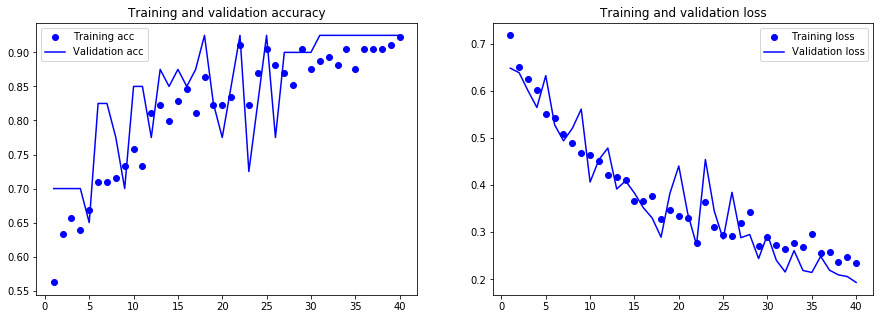

In [16]:
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We can see that the validation curves are closely tracking the training curves, reaching an accuracy of about 94% and a loss of about 0.2 on the training data, while the validation data had an accuracy of about 93% and a loss of about 0.19. This gives a good indication of how well the model generalizes on new data. Achieving this result with a relatively small dataset is quite impressive, however, we would improve this accuracy by either data augmentation or using a pretrained model like VGG 19.


## 5 - Model Evaluation on Testing data
Finally we evaluate the model on the test data.

In [17]:
# Prediction on the testing dataset
test_loss, test_acc = model.evaluate(test_x, test_y, verbose=0)
print("Model accuracy on test data is {}%".format(round(test_acc*100),0))

Model accuracy on test data is 92%


Here we get an accuracy of 92% on the test data, a set the model up till now hadn't seen before. Not a bad result at all for a model trained on such a small dataset. Let's proceed to load some pictures and see how well the model performs in distinguishing between cat and non-cat images.

## 6 - Load and perform prediction on new images

In [18]:
def predict_image(model, img_path):
    """Performs predictions on images
    
    Arguments:
    model    -- a trained convolutional neural network model
    img_path -- path to the image(s) to be passed to the model
    
    Returns:
    Prints the prediction of the model as a probability score and 
    the image passed to the model for prediction    
    """
    
    # Load the image
    image_orig = image.load_img(img_path, target_size=(64,64))
    
    # convert images to numpy arrays
    x = image.img_to_array(image_orig)
    
    # expand the shape of the image array
    x = np.expand_dims(x, axis=0) / 255.

    # perform prediction on the resulting array
    predicted_image = model.predict(x)
    
    # define class based on predicted score
    class_ = 0
    if predicted_image >= 0.5:
        class_ = 1
    else:
        class_ = 0

    # Preform prediction
    print ("Probablity = " + str(np.squeeze(predicted_image)) + ",  the model predicts a \"" + classes[class_].decode("utf-8") +  "\" picture.")
    
    # Display Original Image to predict
    plt.imshow(image_orig)
    plt.show()

Probablity = 0.81216794,  the model predicts a "cat" picture.


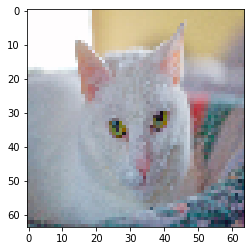

Probablity = 0.52483714,  the model predicts a "cat" picture.


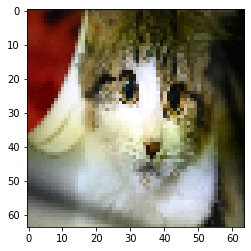

Probablity = 0.14069138,  the model predicts a "non-cat" picture.


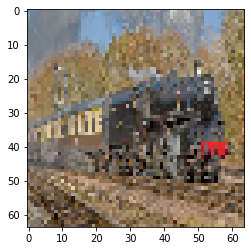

Probablity = 0.0032041827,  the model predicts a "non-cat" picture.


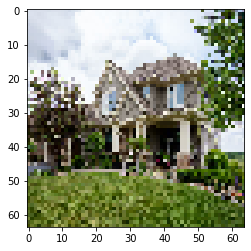

Probablity = 0.0065558525,  the model predicts a "non-cat" picture.


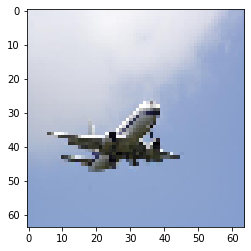

Probablity = 0.059270486,  the model predicts a "non-cat" picture.


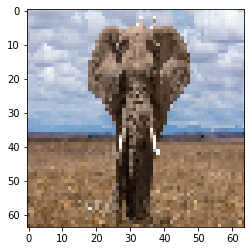

Probablity = 0.00095800014,  the model predicts a "non-cat" picture.


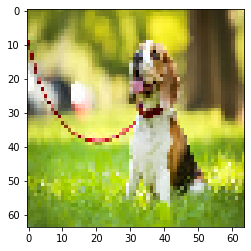

Probablity = 0.7007004,  the model predicts a "cat" picture.


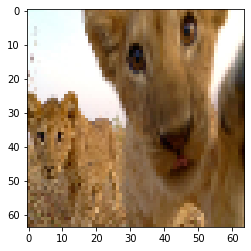

Probablity = 0.109202266,  the model predicts a "non-cat" picture.


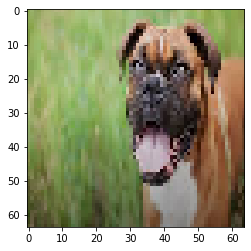

In [19]:
# Loops through a number of pictures and predicts the image in the picture
num_images = 9

for  i in range(1, num_images+1):
    #plt.subplot(6,5, i+1)
    image_path = "images/my_image_" + str(i) + ".jpg"
    predict_image(model, image_path)

We passed 9 pictures to the trained model, and the model correctly predicts the image on each picture. This is pretty impressive for a model with an accuracy of 92%. It will interesting to run multiple images through the model, to understand what category of images the model struggles to predict. 


## 7 - Summary.

In this project, we explored how well a "not too deep" neural network model would perform in distinquishing images of cats from non-cat images in pictures with a small dataset. The dataset contains 169, 40 and 50 training, validation and testing datasets respectively, and with a few lines of code, we successfully showed how you can build a deep neural netowrk to perform image classification. 

We used a 4-layer neural network comprising of 2 Convvolutional hidden layers, 1 Dense hidden layer and a Dense output layer to train the model. According to the literature, convnets are the most preferred models for computer vision tasks, and work pretty well on very small datasets as the above results show.

Next tasks will be to attempt improving the accuracy of the model by applying regularization, data augmentation, transfer learning (use of pre-trained convnet), etc.